## 1 Theory

### 1.1 The 2-D Ising Model

We consider a square lattice  
$\Lambda = \{(i, j) \mid i, j = 1, \dots, L\}$  
with a binary spin variable  
$\sigma_{i,j} \in \{-1, +1\}$ for every site $(i,j) \in \Lambda$.

The **nearest-neighbour ferromagnetic Hamiltonian** is:

$$
H(\sigma) = -J \sum_{\langle (i,j), (k,\ell) \rangle} \sigma_{i,j} \, \sigma_{k,\ell}
\tag{1.1}
$$

where the sum runs over each pair of nearest neighbours **once**, and the coupling $J > 0$ favours parallel alignment of spins.

---

### 1.2 Boltzmann Distribution and Metropolis Rule

At temperature $T$, the probability of a spin configuration is given by the Boltzmann distribution:

$$
\mathcal{P}(\sigma) = \frac{1}{Z} \exp\left( -\beta H(\sigma) \right), \quad \text{with} \quad \beta = \frac{1}{k_B T}
$$

Here, $Z$ is the partition function that ensures normalization.

The Metropolis algorithm simulates this distribution by attempting spin flips $\sigma_{i,j} \to -\sigma_{i,j}$ and accepting them with probability:

$$
p_{\text{acc}} =
\begin{cases}
1, & \Delta E \le 0 \\
\exp(-\beta \Delta E), & \Delta E > 0
\end{cases}
$$

where $\Delta E$ is the energy change caused by flipping one spin. For a spin $\sigma_{i,j}$ and its four nearest neighbours, we compute:

$$
\Delta E = 2J \sigma_{i,j} \sum_{\text{nn}} \sigma_{\text{nn}}
$$

---

### 1.3 Exact Results in the Thermodynamic Limit

In the limit $L \to \infty$, the 2-D Ising model has an exact solution. The **critical inverse temperature** is:

$$
\beta_c = \frac{\ln(1 + \sqrt{2})}{2J}, \quad \Rightarrow \quad T_c \approx 2.269 \quad \text{(for } J = 1 \text{)}
\tag{1.2}
$$

Below $T_c$, the system exhibits **spontaneous magnetization**, given by Yang’s formula:

$$
m(T) = \left[ 1 - \sinh^{-4}(2J\beta) \right]^{1/8} \quad \text{for } T < T_c
\tag{1.3}
$$

Above $T_c$, the magnetization vanishes: $m(T) = 0$.

---

### 1.4 Observables in Simulation

In Monte Carlo simulations, we measure several physical quantities as time-averaged values after the system reaches equilibrium.

Let $N = L^2$ be the total number of spins. The key observables are:

- **Magnetization per spin**:  
  $$
  m = \frac{1}{N} \sum_{i,j} \sigma_{i,j}
  $$

- **Energy per spin**:  
  $$
  e = \frac{H}{N}
  $$

- **Magnetic susceptibility** (from fluctuations of $m$):  
  $$
  \chi = N \left( \langle m^2 \rangle - \langle m \rangle^2 \right)
  $$

- **Specific heat** (from fluctuations of $e$):  
  $$
  C = \frac{N}{T^2} \left( \langle e^2 \rangle - \langle e \rangle^2 \right)
  $$

Here, $\langle \cdot \rangle$ indicates an average over MCMC samples **after thermalization**.

---

### 1.5 Finite-Size Effects

In a finite system (e.g. $L = 100$), the sharp singularities of the phase transition are rounded:

- The magnetization drops rapidly but continuously near $T_c$
- The peaks in $\chi(T)$ and $C(T)$ become finite and shift slightly
- Domain walls become visible as the system fluctuates near criticality

To extract critical exponents (e.g. $\beta_m$, $\gamma$, $\nu$), one can run simulations at different system sizes and use **finite-size scaling**.

---

### 1.6 Critical Slowing Down

Near the critical temperature $T_c$, the system’s relaxation time increases dramatically:

- The **autocorrelation time** $\tau$ scales as $\tau \sim \xi^z$ where $\xi$ is the correlation length and $z$ is the dynamical exponent
- For local update algorithms like Metropolis, $z \approx 2$
- This leads to **critical slowing down**, meaning many MCMC sweeps are needed to obtain independent samples

In more advanced simulations, **cluster algorithms** (e.g. Wolff or Swendsen-Wang) can be used to eliminate this slowing down. In our work, we rely on the Metropolis algorithm for simplicity.

---


In [1]:
from app import IsingModel
from plotting import plot_observables, plot_snapshot_grid, plot_phase_transition
from phase_diagram import run_phase_sweep


In [2]:
snapshot_steps = [0, 2000, 4000, 6000, 9000, 12000, 14000, 16000, 18000]

In [3]:
model1 = IsingModel(L=100, T=2.5, J=1.0,  init_type="all_up")
model1.run(sweeps=15000, record_every=1)
model2 = IsingModel(L=100, T=2.5, J=1.0,  init_type="random")
model2.run(sweeps=20000, record_every=1, snapshot_steps=snapshot_steps)
model3 = IsingModel(L=100, T=2.5, J=1.0,  init_type="all_down")
model3.run(sweeps=15000, record_every=1)

model4 = IsingModel(L=100, T=2, J=1.0,  init_type="all_up")
model4.run(sweeps=15000, record_every=1)
model5 = IsingModel(L=100, T=2, J=1.0,  init_type="random")
model5.run(sweeps=15000, record_every=1)
model6 = IsingModel(L=100, T=2, J=1.0,  init_type="all_down")
model6.run(sweeps=15000, record_every=1)
model7 = IsingModel(L=100, T=2, J=1.0,  init_type="random")
model7.run(sweeps=20000, record_every=1, snapshot_steps=snapshot_steps)


model7.energy_history = model7.energy_history[0:15000].copy()
model7.magnetization_history = model7.magnetization_history[0:15000].copy()

model2.energy_history = model2.energy_history[0:15000].copy()
model2.magnetization_history = model2.magnetization_history[0:15000].copy()

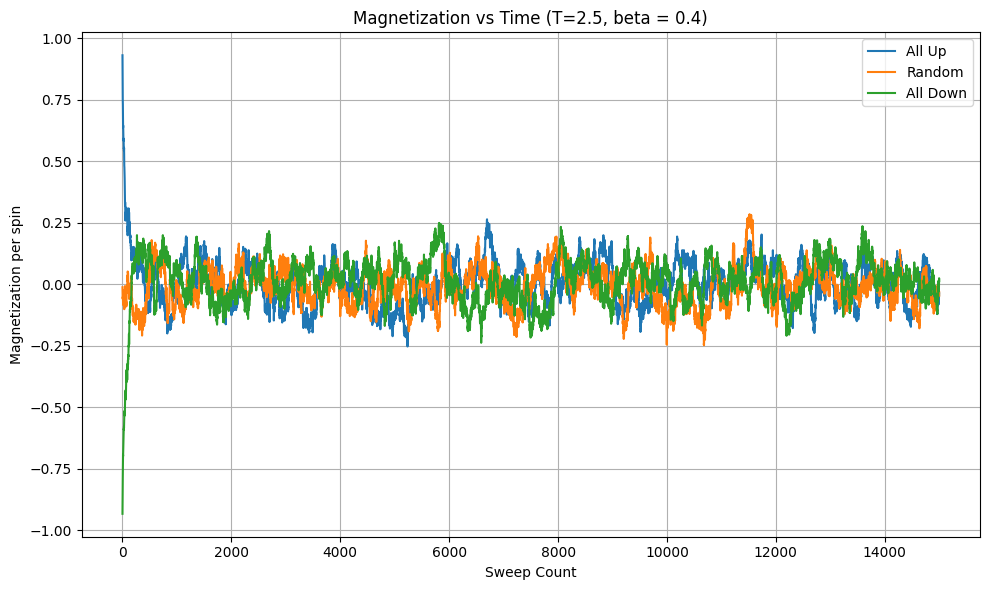

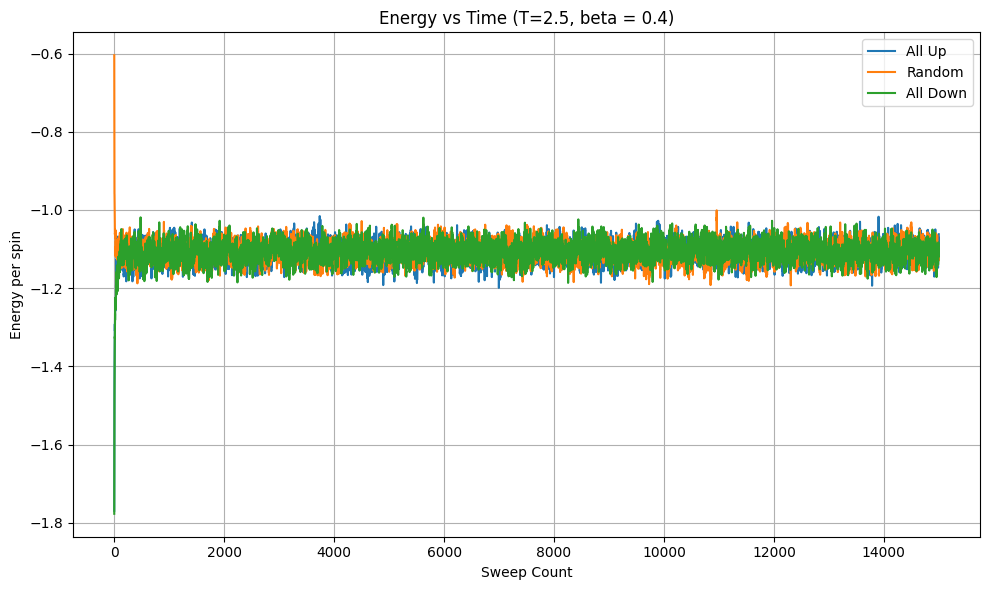

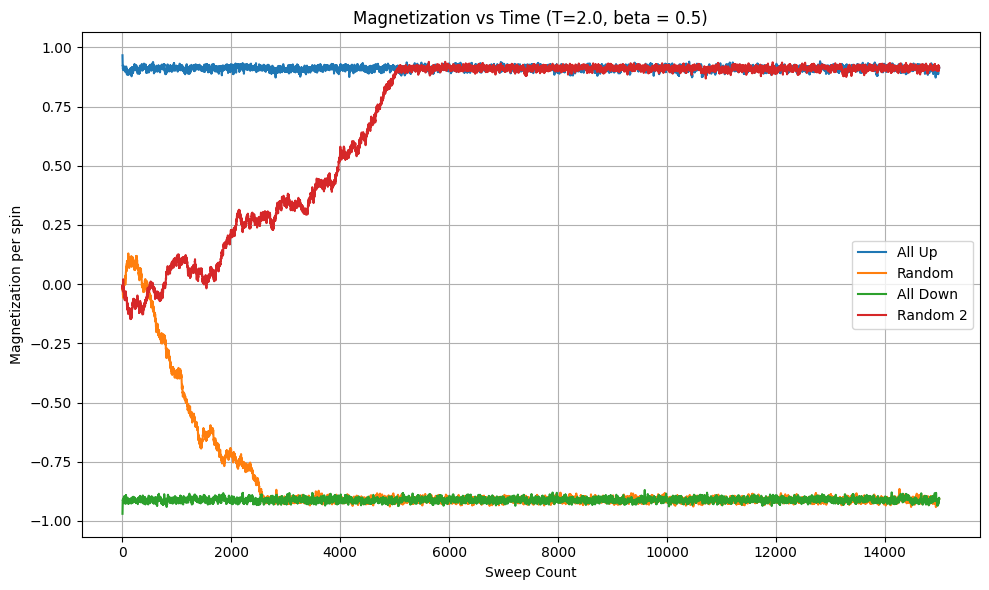

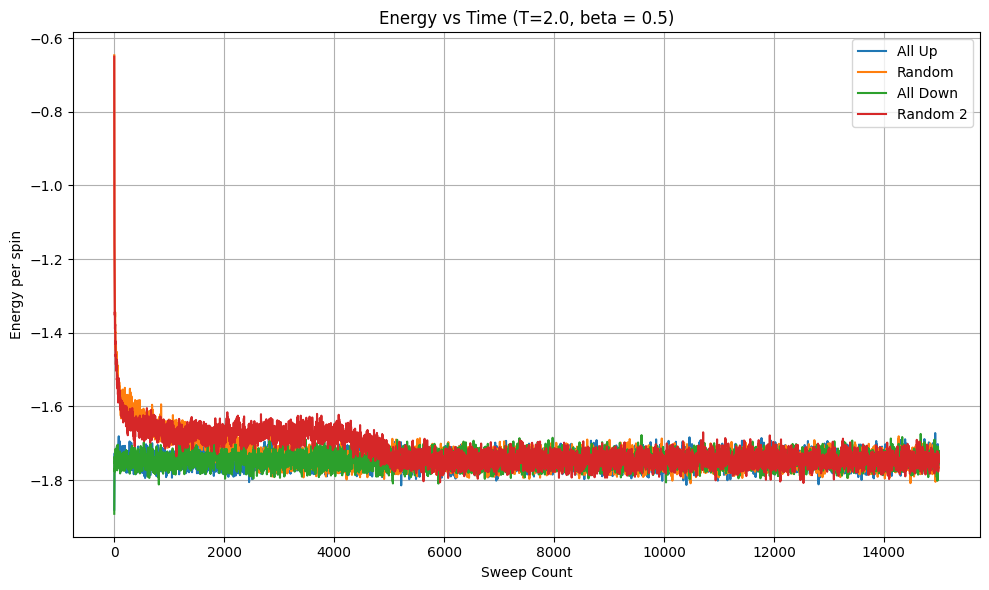

In [4]:
plot_observables([model1, model2, model3], observable="magnetization",
                     labels=["All Up", "Random", "All Down"],
                     title="Magnetization vs Time (T=2.5, beta = 0.4)")
plot_observables([model1, model2, model3], observable="energy",
                     labels=["All Up", "Random", "All Down"],
                     title="Energy vs Time (T=2.5, beta = 0.4)")
plot_observables([model4, model5, model6, model7], observable="magnetization",
                     labels=["All Up", "Random", "All Down" , "Random 2"],
                     title="Magnetization vs Time (T=2.0, beta = 0.5)")
plot_observables([model4, model5, model6, model7], observable="energy",
                     labels=["All Up", "Random", "All Down", "Random 2"],
                     title="Energy vs Time (T=2.0, beta = 0.5)")

<module 'matplotlib.pyplot' from 'D:\\python\\MonteCarloMetropolisKT\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

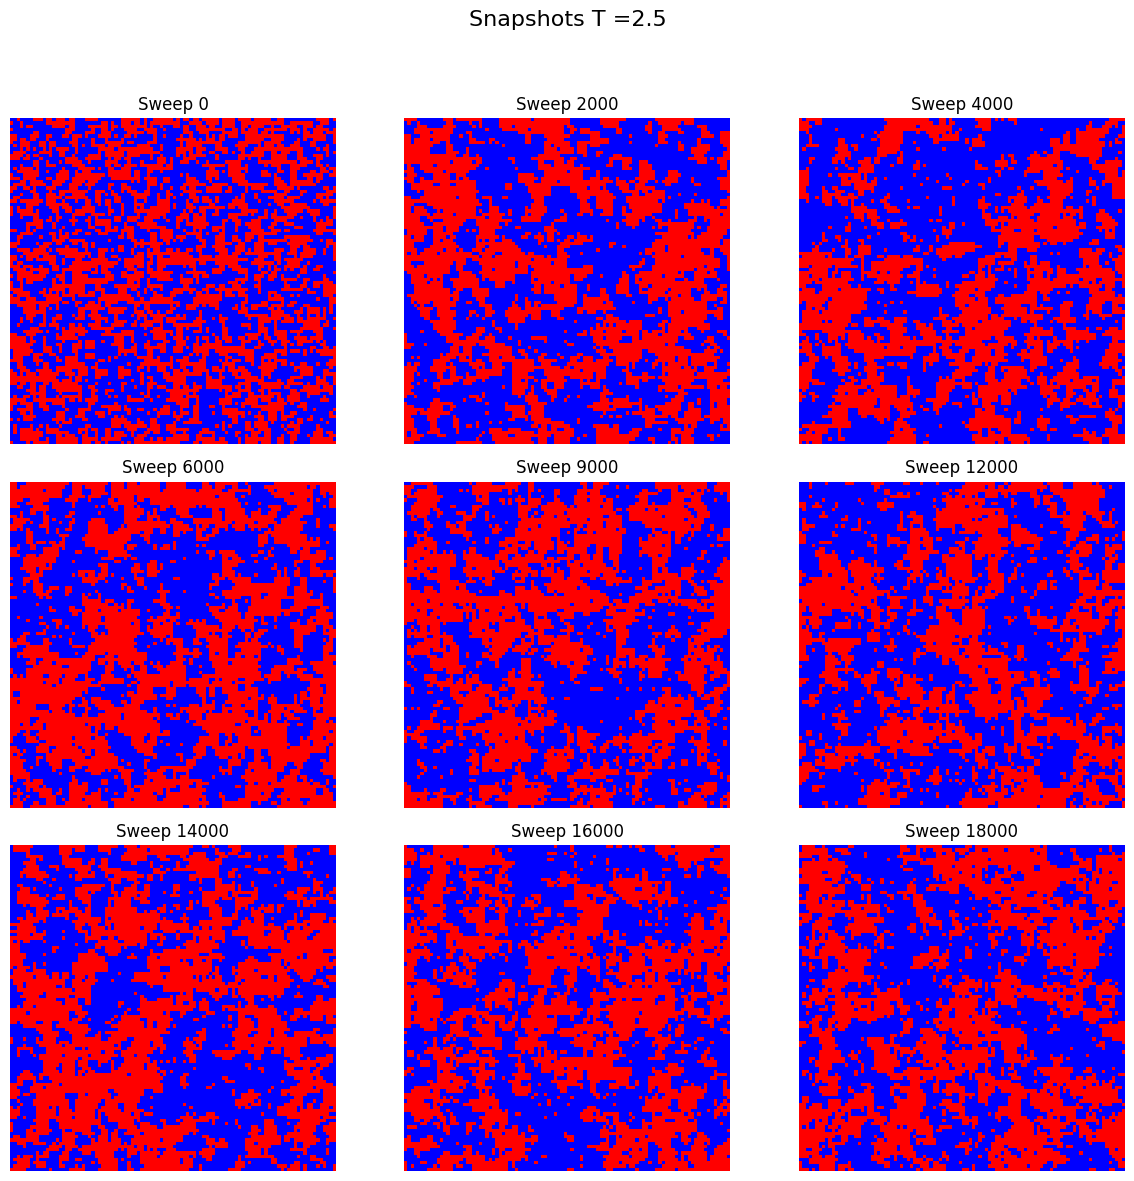

In [5]:
steps = len(snapshot_steps)
plot_snapshot_grid(model2, snapshot_steps, title="Snapshots T =2.5", cmap="bwr")

<module 'matplotlib.pyplot' from 'D:\\python\\MonteCarloMetropolisKT\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

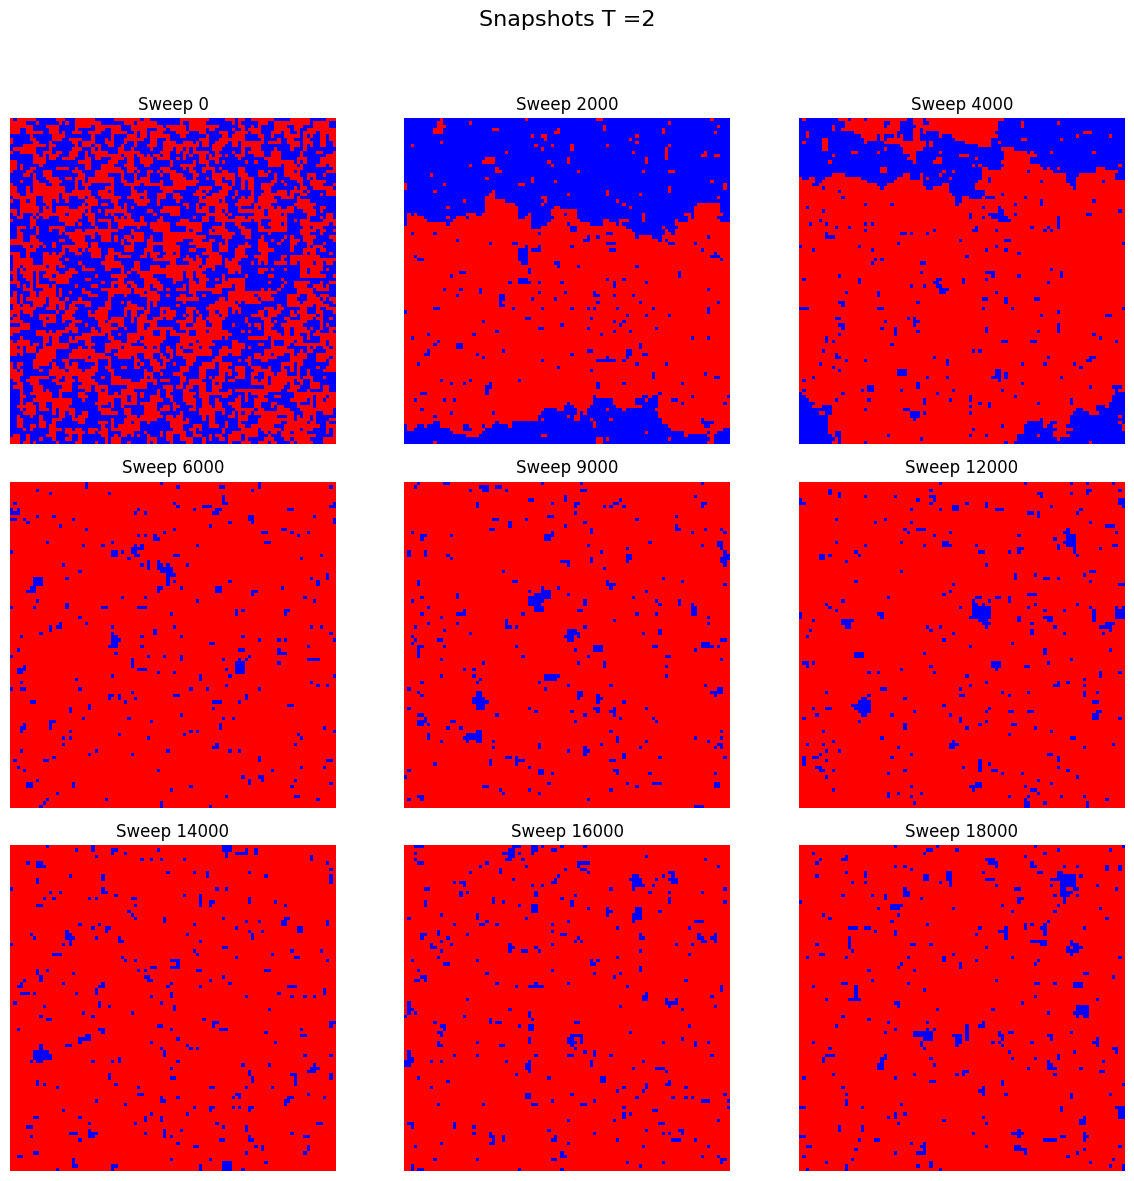

In [6]:
plot_snapshot_grid(model7, snapshot_steps, title="Snapshots T =2", cmap="bwr")

Running T = 1.000
Running T = 1.132
Running T = 1.263
Running T = 1.395
Running T = 1.526
Running T = 1.658
Running T = 1.789
Running T = 1.921
Running T = 2.053
Running T = 2.184
Running T = 2.316
Running T = 2.447
Running T = 2.579
Running T = 2.711
Running T = 2.842
Running T = 2.974
Running T = 3.105
Running T = 3.237
Running T = 3.368
Running T = 3.500
Running T = 2.269


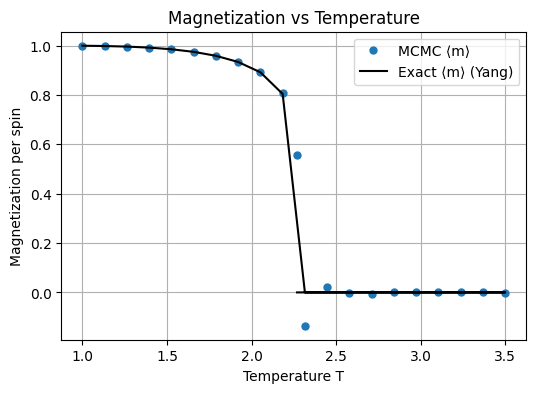

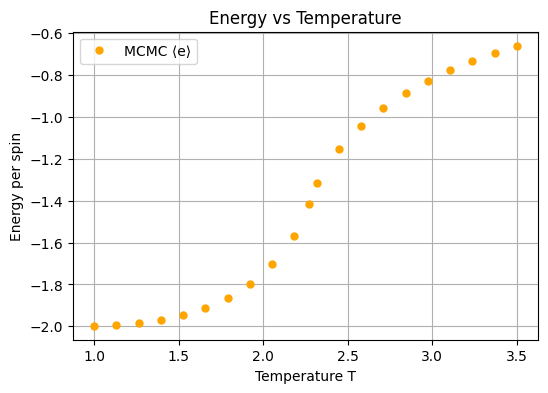

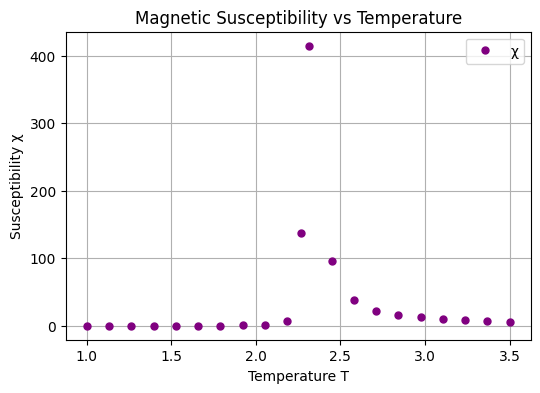

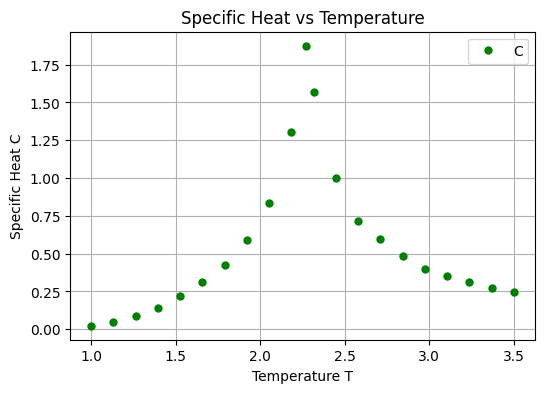

In [7]:
import numpy as np
T_range = np.linspace(1, 3.5, 20)  # Around critical point
T_range = np.append(T_range, 2.269)
results = run_phase_sweep(T_range, sweeps=20000, record_every=1,discard_frac=0.3, L=100)
plot_phase_transition(results)